In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

In [2]:
def spin_lattice(N):
    spin = np.random.choice([-1,1], size=(N, N))

    return spin

In [3]:
def interaction_matrix_J(N, tt, p_herd):

  # p_herd es la proporción de rebaño en la matrix.

  matrix = np.zeros((N, N), dtype=int)
  values = [1] * round(N**2 * p_herd) + [-1] * round(N**2 * (1-p_herd))

  random.shuffle(values)
  matrix.flat = values

  matrix = np.zeros([len(tt), N, N, N, N])

  for t in range(len(tt)):
    for i in range(N):
      for j in range(N):
          for k in range(N):
            for l in range(N):
              matrix[t,i,j,k,l] = matrix[i,j]*np.random.uniform(0,1.1)

            
  for t in range(len(tt)):
    for i in range(N):
      for j in range(N):
        matrix[t,i,j,i,j] = 0
        
  return matrix

In [4]:
def interaction_matrix_J(N, tt):
  

  matrix = 1.1*np.random.uniform(-1, 1, size=(len(tt), N, N, N, N))
  # matrix = np.ones([N,N,N,N])/20
  for t in range(len(tt)):
    for i in range(N):
      for j in range(N):
        matrix[t,i,j,i,j] = 0
  return matrix

In [5]:
def magnetic_field_h(N, tt):
    min_h_t = -0.3
    max_h_t = 0.3
    h_field_t = np.random.uniform(min_h_t, max_h_t, size = (len(tt),N,N))
    return h_field_t

In [6]:
def flip_energy(spin, interaction_matrix_J, matrix_h, i, j, t):
  E = 0
  E += 2*spin[i,j]*matrix_h[t,i,j]
  N = spin.shape[0]
  for k in range(N):
    for l in range(N):
      E += 2*interaction_matrix_J[t,i,j,k,l]*spin[i,j]*spin[k,l]

  return E

In [7]:
def active_agents(AA,N):

    
    x = random.sample(range(0, N), AA)
    y = random.sample(range(0, N), AA)

    return x, y

0.1


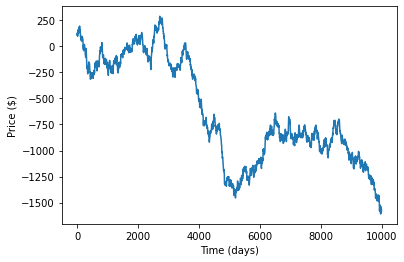

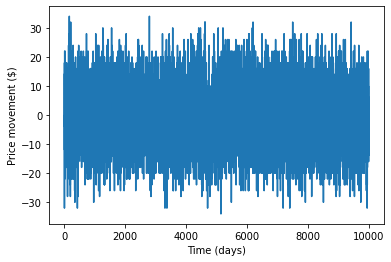

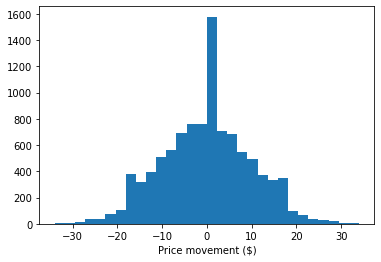

In [11]:
N = 10
AA = N
t0 = 0
tmax = 10000
TT = np.linspace(1,10,11)

p_herd = 0.5

tt = np.arange(t0,tmax + 1, 1)
cum_mag = 100 # La ponemos a 100$
spin = spin_lattice(N)
J = interaction_matrix_J(N,tt)

h = magnetic_field_h(N, tt)
TT = [0.1]

for T in TT:
  cum_mag_list = []
  inst_mag_list = []
  inst_mag_list_steps = []

  for t in tt:
      M_inst = 0
      AA_x, AA_y = active_agents(AA,N)
      for i in AA_x:
          for j in AA_y:

              flip_E = flip_energy(spin, J, h, i, j, t)
              uni_sample = random.uniform(0, 1)

              if flip_E <= 0:
                  spin[i, j] = -spin[i, j]

              elif (flip_E> 0) and (np.exp(-flip_E/T) >= uni_sample):
                  spin[i, j] = -spin[i, j]

              else:
                  spin[i, j] = spin[i, j]

              cum_mag += spin[i, j]
              M_inst += spin[i,j] 

              inst_mag_list_steps.append(sum(sum(spin)))

      cum_mag_list.append(cum_mag)
      inst_mag_list.append(M_inst)

  print(T)

  plt.plot(tt[::5], cum_mag_list[::5])
  plt.xlabel("Time (days)")
  plt.ylabel("Price ($)")
  plt.savefig("mock_example.png")
  plt.show()

  plt.plot(tt, inst_mag_list)
  plt.xlabel("Time (days)")
  plt.ylabel("Price movement ($)")
  plt.show()

  plt.hist(inst_mag_list,bins=30)
  plt.xlabel("Nº días")
  plt.xlabel("Price movement ($)")
  plt.show()

<ipython-input-12-cd2bf713614d>:4: RuntimeWarning: divide by zero encountered in long_scalars
  percentages = [(inst_mag_list[i]/cum_mag_list[i-1]*100) for i in range(1,len(inst_mag_list)) if abs(inst_mag_list[i]/cum_mag_list[i-1]*100)<30]
<ipython-input-12-cd2bf713614d>:4: RuntimeWarning: invalid value encountered in long_scalars
  percentages = [(inst_mag_list[i]/cum_mag_list[i-1]*100) for i in range(1,len(inst_mag_list)) if abs(inst_mag_list[i]/cum_mag_list[i-1]*100)<30]


Return distribution Kurtosis value: 8.121
Normal distribution Kurtosis value: -0.153


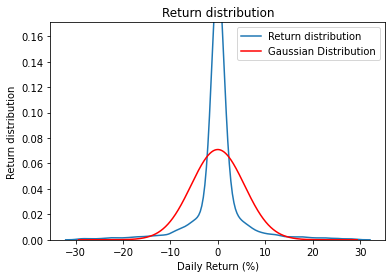

In [12]:
import seaborn as sns
from scipy.stats import kurtosis, norm

percentages = [(inst_mag_list[i]/cum_mag_list[i-1]*100) for i in range(1,len(inst_mag_list)) if abs(inst_mag_list[i]/cum_mag_list[i-1]*100)<30]

# Ajustamos a una distribución normal para ver cómo se parece a ella:
mu, std = norm.fit(percentages)
x = np.linspace(min(percentages), max(percentages), len(percentages))
normal_adj = norm.pdf(x, mu, std)

sns.kdeplot(percentages)
plt.plot(x, normal_adj, 'r-', label='Normal Distribution')

plt.xlabel('Daily Return (%)')
plt.ylabel('Return distribution')
plt.title('Return distribution')
plt.ylim([0,max(normal_adj)+0.1])
plt.legend([f"Return distribution",f"Gaussian Distribution"],loc=1)
plt.savefig("Return distribution.png")
print("Return distribution Kurtosis value:",round(kurtosis(percentages),3))
print("Normal distribution Kurtosis value:",round(kurtosis(normal_adj),3))

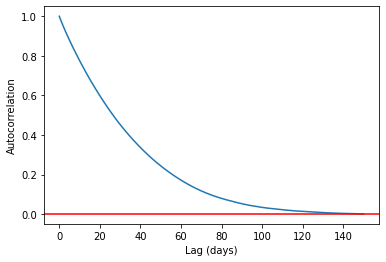

In [15]:
periods = np.arange(0,151,1)
autocorrelations = {}

r_abs_mean = np.absolute(np.array(inst_mag_list_steps)).mean()

for p in periods:
  up = 0
  down = 0
  for i in range(p,len(inst_mag_list_steps)):
    up += (abs(inst_mag_list_steps[i]) - r_abs_mean) * (abs(inst_mag_list_steps[i-p]) - r_abs_mean)
  for j in range(len(inst_mag_list_steps)):
    down += (abs(inst_mag_list_steps[j]) - r_abs_mean)**2

  autocorrelations[p] = up/down

plt.plot(periods,autocorrelations.values())
plt.xlabel("Lag (days)")
plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Autocorrelation")
plt.savefig("Autocorrelation")
plt.show()

### We understand Autocorrelation as the memory in volatility.

### The slow decline of autocorrelation values can be considered a sign of volatility clustering. This means that today's high volatility periods will most likely be followed by high volatility periods tomorrow, the day after tomorrow and so on. 

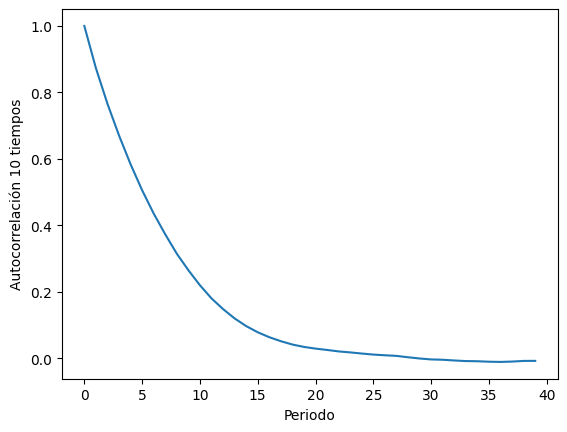

In [ ]:
inst_mag_list_10 = [inst_mag_list_steps[i] for i in range(len(inst_mag_list_steps)) if i%5 == 0]

periods = np.arange(0,40,1)
autocorrelations_10 = {}

r_abs_mean = np.absolute(np.array(inst_mag_list_10)).mean()

for p in periods:
  up = 0
  down = 0
  for i in range(p,len(inst_mag_list_10)):
    up += (abs(inst_mag_list_10[i]) - r_abs_mean) * (abs(inst_mag_list_10[i-p]) - r_abs_mean)
  for j in range(len(inst_mag_list_10)):
    down += (abs(inst_mag_list_10[j]) - r_abs_mean)**2

  autocorrelations_10[p] = up/down

plt.plot(periods,autocorrelations_10.values())
plt.xlabel("Lag")
plt.ylabel("Autocorrelation 10 time steps")
plt.show()